<a href="https://www.kaggle.com/code/gilberteparente/tp2-ia-l?scriptVersionId=135234063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Este Dataset Trabalha os dados de uma companhia de seguros para automóveis.

# Contexto do Trabalho Prático

O cliente que requisitou este trabalho é uma companhia de seguros que vendeu seguros de saúde aos seus clientes e agora precisa de ajuda para construir um modelo que permita prever se os seus clientes de seguros de saúde tmbém estarão interessados no seguro automóvel fornecido pela empresa.

Uma apólice de seguro é um acordo através do qual uma empresa se compromete a fornecer uma garantia de indemnização por perdas, danos, doença ou morte, em troca do pagamento de um determinado valor monetário através de uma contrato anual, pago mensalmente.

Tal como o seguro de saúde, existe um seguro automóvel em que todos os anos o cliente tem de pagar uma anuidade de um determinado montante à empresa de seguros para que, em caso de acidente com o veículo, a empresa de seguros forneça uma indemnização ao cliente.

A construção de um modelo que permita prever se um cliente está interessado num seguro automóvel é extremamente útil para a empresa, uma vez que esta pode planear a sua estratégia de comunicação para chegar a esses clientes e otimizar o seu modelo de negócio e as suas receitas.

Para prever se o cliente está interessado num seguro automóvel, é necessário dispor de informações sobre dados demográficos (sexo, idade, tipo de código de região), veículos (idade do veículo, danos), apólice (prémio, canal de abastecimento).

Este modelo foi desenvolvido mediante um questionário que fizeram a todos os clientes questionando se estarão interessados em adicionar ao seguro de saúde um seguro automóvel.

Foram disponibilizados para a construção deste modelo 2 Modelos de dados (Dataset), um modelo de treino, que contem a resposta do cliente ao questionário de interesse, e um modelo de teste para testar esta implementação.

O objectivo é validar se os elementos do dataset de teste vão responder positivamente ao questionário.

# Importação das librarias

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import tensorflow as tf

In [3]:
# Importação dos modelos de Machine Learning
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.metrics import classification_report

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ia-tp2/tp2ia.ipynb
/kaggle/input/ia-tp2/sample_submission.csv/sample_submission.csv
/kaggle/input/ia-tp2/train.csv/train.csv
/kaggle/input/ia-tp2/test.csv/test.csv


In [6]:
# Directório dos dataset
os.listdir('/kaggle/input/')

['ia-tp2']

# Importação dos Dataset

In [8]:
ds_treino = pd.read_csv("/kaggle/input/ia-tp2/train.csv/train.csv")
ds_teste = pd.read_csv("/kaggle/input/ia-tp2/test.csv/test.csv")

In [9]:
ds_treino

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**Informação sobre o tipo de dados do Dataset**

In [ ]:
ds_treino.info()

### Descrição das variáveis

| Column Name | Column Description | 
| --- | --- |
| id | Indentificador único do cliente |
| Gender | Género do cliente |
| Age | Idade do cliente |
| Driving_License | 0 - Cliente não tem liçença, 1 - Cliente tem licença |
| Region_Code | Código da região do cliente |
| Previously_Insured | 1 - Cliente tem seguro automóvel, 0 - Cliente não tem seguro automóvel |
| Vehicle_Age | Idade do veículo |
| Vehicle_Damage | 1 - Cliente já teve o carro acidentado. 0 - Cliente ainda não teve o carro acidentado. |
| Annual_Premium | Valor pago pelo cliente por ano |
| Policy_Sales_Channel | Código do canal de fidelização do cliente (telefone, presencial, chamada) |
| Vintage | Número de dias que o cliente está fidelizado à empresa de seguros |
| Response | 1 - Cliente está interessado, 0 - Cliente não está interessado |


**Informação quanto ao conteúdo (Numero de linhas/colunas)**

No dataset de treino tem uma coluna que não existe no dataset de teste. Esta coluna representa o questionario realizado aos clientes da empresa que já possuem seguro de saúde e se estão interessados em seguro automóvel

In [ ]:
train_num_rows, train_num_cols = ds_treino.shape
print(f'Dataset Treino \nNúmero de linhas : {train_num_rows}\nNúmero de colunas: {train_num_cols}')

In [ ]:
test_num_rows, test_num_cols = ds_teste.shape
print(f'Dataset Teste \nNúmero de linhas : {test_num_rows}\nNúmero de colunas:{test_num_cols}')

# Análise das Variàveis

**Esta análise tem como base relacionar a resposta ao questionário com as principais variáveis do Dataset. Deste  modo vamos puder retirar conclusões sobre a importância que estas podem ter para o modelo de previsão que vamos construir**

<h3 style="font-size: 25px">Resultado do questionário

In [ ]:
ds_treino["Response"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

Podemos concluir que neste dataset apenas 12,26% dos clientes estão interessados em adicionar o seguro automóvel ao de saúde.

In [ ]:
sns.distplot(ds_treino['Age'])

Podmeos concluir que a idade entre os 20 e os 30 representa a maior grandeza neste dataset.

<h3 style="font-size: 25px">Correlação entre a resposta e o género

In [ ]:
fig=px.histogram(ds_treino,
                x='Response',
                marginal='box',
                color='Gender',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a resposta e o género'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que o género não é um fator determinante para influenciar a resposta e não existe interferencia entre que quer ou não o seguro.

<h3 style="font-size: 25px">Correlação entre a resposta e a idade

In [ ]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Response",y="Age", data=ds_treino, kind='box')
plt.title("Correlação entre a resposta e a idade", size=20, y=1.0);

Podemos concluir que as pessoas entre os 25 e os 35 anos de idade não mostram interesse no seguro automóvel. Já as pessoas entre os 35 e os 50 tem bastante interesse no seguro.

<h3 style="font-size: 25px">Correlação entre a Resposta e o Código da região

In [ ]:
fig=px.histogram(ds_treino,
                x='Region_Code',
                marginal='box',
                color='Response',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a Resposta e o Código da região'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que não existe muita correlação entre o código da região e a reposta. Verifica-se um pico de repostas positivas no código de região número 28.

<h3 style="font-size: 25px">Correlação entre a resposta e se o cliente já teve o veículo danificado

In [ ]:
fig=px.histogram(ds_treino,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a resposta e se o cliente já teve o veículo danificado'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que das pessoas que já tiveram acidentes estão mais propicias a adicionar o seguro automóvel

<h3 style="font-size: 25px">Correlação entre a resposta e o prémio anual

In [ ]:
fig=px.histogram(ds_treino,
                x='Response',
                marginal='box',
                color='Vehicle_Age',
                color_discrete_sequence=['#0000CD', '#BA55D3', '#FA55D3'],
                title='Correlação entre a resposta e se o cliente já teve o veículo danificado'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que dos clientes que responderam positivamente, os que tem automóveis entre 1 e 2 anos são os que maior probabilidade tem de adicionar o seguro automóvel

# Regressão linear entre a resposta e a Anuidade paga pelos clientes mediante os dias de contrato

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='Annual_Premium', y ='Vintage', data = ds_treino, 
           hue ='Response', markers =['o', 'v'])

POdemos verificar que quanto mais elevada a anuidade menos a probabilidade de adquirir seguro de carro, e ligeiro ascendente para os clientes que estão fidelizados à mais tempo a aceitarem o seguro automóvel

# Regressão Linear entre a anuidade paga pelos clientes e o número de dias que estes estão fidelizados

In [ ]:

sns.lmplot(data=ds_teste, x='Annual_Premium', y='Vintage')

# Tratamento dos Dados

In [10]:
ds_treino.drop(["id"] , axis = 1 , inplace = True)
ds_teste.drop(["id"] , axis = 1 , inplace = True)

In [11]:
ds_treino["Gender"] = np.where(ds_treino["Gender"] == "Male" , 1 , 0)

In [12]:
ds_treino["Vehicle_Damage"] = np.where(ds_treino["Vehicle_Damage"] == "Yes" , 1 , 0)
ds_teste['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)

In [13]:
ds_treino['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

ds_teste['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [ ]:
ds_treino

# Correlação entre variáveis

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(ds_treino.corr(), annot=True);

Encontra-se uma boa correlação entre todas as variáveis, o que pode resultar num bom  modelo de previsão

# Regressão Logistica

**Definir a coluna alvo de previsão**

In [14]:
input_cols=list(ds_treino.columns)[0:-1]
target_col='Response'

<h3 style="font-size: 25px">Dividir os dados para treino

In [15]:
inputs=ds_treino[input_cols]
targets=ds_treino[target_col]

In [16]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets,val_targets=train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [18]:
model=LogisticRegression(solver='liblinear')
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

<h3 style="font-size: 25px">Calcular as previsões, probabilidades e acurácia do modelo de classificação nos dados de treino.

In [19]:
%%time
train_preds=model.predict(train_inputs)
train_probs=model.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds)

CPU times: user 201 ms, sys: 149 ms, total: 349 ms
Wall time: 96.6 ms


0.8780302210327104

Função para usar o modelo de previsão. Calcula a % de veracidade, e a matriz da confusão

In [20]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets,name=''):
    preds=model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

<h3 style="font-size: 25px">Treinar o Modelo

Accuracy: 87.80%
CPU times: user 422 ms, sys: 303 ms, total: 724 ms
Wall time: 264 ms


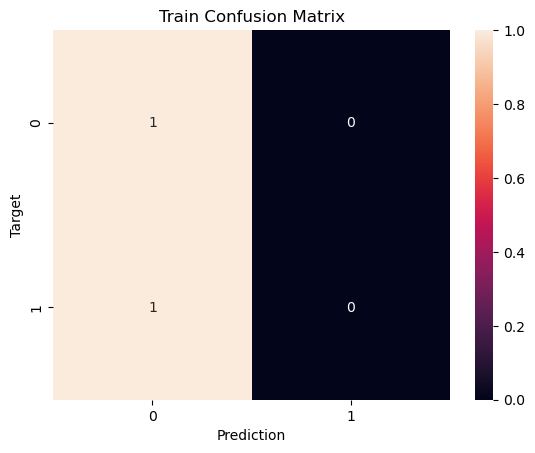

In [21]:
%%time
train_preds=predict_and_plot(train_inputs, train_targets,'Train')

<h3 style="font-size: 25px">Previsão usando o Modelo

Accuracy: 87.51%
CPU times: user 440 ms, sys: 321 ms, total: 761 ms
Wall time: 226 ms


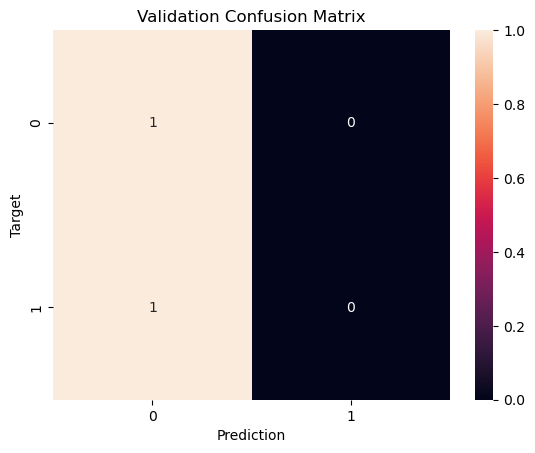

In [22]:
%%time
val_preds=predict_and_plot(val_inputs, val_targets,'Validation')

ValueError: x and y must be the same size

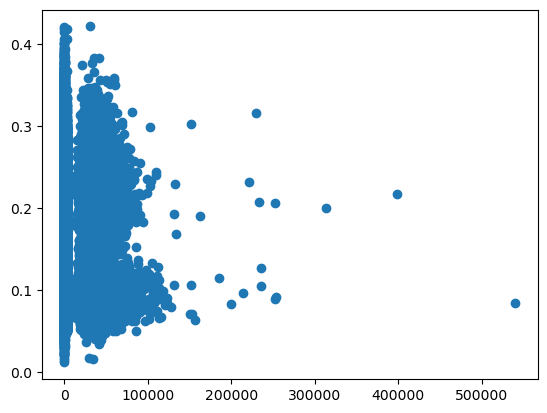

In [37]:

# Extrair as colunas de entrada e alvo do DataFrame
input_cols = list(ds_treino.columns)[:-1]
target_col = 'Response'
inputs = ds_treino[input_cols]
targets = ds_treino[target_col]

# Dividir os dados para treinamento
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão logística
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs, train_targets)

# Função para plotar a curva de regressão logística
def plot_logistic_regression_curve(model, inputs, targets):
    # Calcular probabilidades previstas pelo modelo
    probabilities = model.predict_proba(inputs)[:, 1]

    # Obter os índices ordenados
    sorted_indices = np.argsort(inputs.values.flatten())

    # Excluir qualquer índice fora dos limites
    sorted_indices = sorted_indices[(sorted_indices >= 0) & (sorted_indices < len(probabilities))]

    # Ordenar as entradas e probabilidades usando os índices
    sorted_inputs = inputs.values.flatten()[sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Plotar a curva de regressão logística
    plt.scatter(sorted_inputs, sorted_probabilities, label='Logistic Regression')
    plt.scatter(inputs.values.flatten(), targets, color='red', label='Actual')
    plt.xlabel('Input')
    plt.ylabel('Probability')
    plt.title('Logistic Regression Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plotar a curva de regressão logística usando os dados de treinamento
plot_logistic_regression_curve(model, train_inputs, train_targets)

# Realizar previsões usando o modelo
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

# Calcular a acurácia das previsões
train_accuracy = accuracy_score(train_targets, train_preds)
val_accuracy = accuracy_score(val_targets, val_preds)

print('Train Accuracy: {:.2f}%'.format(train_accuracy * 100))
print('Validation Accuracy: {:.2f}%'.format(val_accuracy * 100))


# Arvore de Decisão

<h3 style="font-size: 25px">Definir a coluna de previsão

In [ ]:
input_cols=list(ds_treino.columns)[0:-1]
target_col='Response'

In [ ]:
inputs=ds_treino[input_cols]
targets=ds_treino[target_col]

<h3 style="font-size: 25px">Dividir os dados para treino

In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets,val_targets=train_test_split(inputs, targets, test_size=0.2, random_state=42)



<h3 style="font-size: 25px">Usar os dados para prever

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_3=DecisionTreeClassifier(random_state=42)
model_3.fit(train_inputs, train_targets)

In [ ]:
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
%%time
train_preds_3=model_3.predict(train_inputs)
train_probs_3=model_3.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds_3)

In [ ]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

In [ ]:
%%time
val_preds = predict_and_plot_3(val_inputs, val_targets, 'Validation')

# <h3 style="font-size: 25px">Random Forest para realizar previsão

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_jobs=-1, random_state=42)
model_2.fit(train_inputs, train_targets)

<h3 style="font-size: 25px">Funções para realizarem a previsão pela àrvore de decisão

In [ ]:
from sklearn.metrics import confusion_matrix
def predict_and_plot_2(inputs, targets,name=''):
    preds=model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

In [ ]:
%%time
val_preds = predict_and_plot_2(val_inputs, val_targets, 'Validation')

<h3 style="font-size: 25px"> Segunda Previsão

In [ ]:
%%time
val_preds = predict_and_plot_2(val_inputs, val_targets, 'Validation')

# Representação da Árvore de decisão

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
plt.figure(figsize=(100,20))
plot_tree(model_3, feature_names=train_inputs.columns, max_depth=3, filled=True);

In [ ]:
model_3_text=export_text(model_3, feature_names=list(train_inputs.columns))
print(model_3_text[:3000])

<h3 style="font-size: 25px">Estatistica da importancia das variaveis

In [ ]:
model_3.feature_importances_

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_3.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

# Conclusões

Podemos concluir que o melhor Modelo de previsão é Árvore de decisão com valores:
Precisão de treino = 87,80302210327104%
Precisão da validação = 87,50623179659416%
A precisão do treino diminuiu, mas a precisão da validação melhorou significativamente.

Também salientar que o Modelo de Regressão Logistica também apresenta valores muito próximos a estes, mas o modelo de árvore de decisão tem uma percentagem maior de previsão.